In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
#loading simulated 50x50x50 data
p_sim = sp.sparse.load_npz('../../data/tilt/50x50x50/pDisc_noise_40000_50x50x50_tilt.npz')
C_sim = sp.sparse.load_npz('../../data/tilt/50x50x50/CDisc_noise_40000_50x50x50_tilt.npz')
junk_sim = sp.sparse.load_npz('../../data/tilt/50x50x50/noiseDisc_40000_50x50x50.npz')

#loading real 50x50x50 data
p_0130 = sp.sparse.load_npz('../../data/real/50x50x50/run_0130_pDisc.npz')
C_0130 = sp.sparse.load_npz('../../data/real/50x50x50/run_0130_CDisc.npz')
junk_0130 = sp.sparse.load_npz('../../data/real/50x50x50/run_0130_junkDisc.npz')
p_0210 = sp.sparse.load_npz('../../data/real/50x50x50/run_0210_pDisc.npz')
C_0210 = sp.sparse.load_npz('../../data/real/50x50x50/run_0210_CDisc.npz')
junk_0210 = sp.sparse.load_npz('../../data/real/50x50x50/run_0210_junkDisc.npz')

p_real = sp.sparse.vstack([p_0130, p_0210], format='csr')
C_real = sp.sparse.vstack([C_0130, C_0210], format='csr')
junk_real = sp.sparse.vstack([junk_0130, junk_0210], format='csr')

In [6]:
#creating labels
p_sim_labels = np.zeros((p_sim.shape[0],))
C_sim_labels = np.ones((C_sim.shape[0],))
junk_sim_labels = np.ones((junk_sim.shape[0],))

p_real_labels = np.zeros((p_real.shape[0],))
C_real_labels = np.ones((C_real.shape[0],))
junk_real_labels = np.ones((junk_real.shape[0],))

# Predicting proton vs. Carbon (w/ Simulated Noise)

In [7]:
pC_sim = sp.sparse.vstack([p_sim, C_sim], format='csr')
pC_sim_labels = np.hstack((p_sim_labels, C_sim_labels))

pC_real = sp.sparse.vstack([p_real, C_real], format='csr')
pC_real_labels = np.hstack((p_real_labels, C_real_labels))

In [8]:
pC_sim_train, pC_sim_test, pC_sim_labels_train, pC_sim_labels_test = train_test_split(pC_sim, pC_sim_labels, test_size=0.25, random_state=42)

In [12]:
reg = 0.001
lr_pC = LogisticRegression(C=reg)
lr_pC.fit(pC_sim_train, pC_sim_labels_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#train on simulated + test on simulated 
pC_sim_pred = lr_pC.predict(pC_sim_test)

print("Accuracy: " + str(metrics.accuracy_score(pC_sim_labels_test, pC_sim_pred)))
print(metrics.classification_report(pC_sim_labels_test, pC_sim_pred))
print(metrics.confusion_matrix(pC_sim_labels_test, pC_sim_pred))

Accuracy: 0.8631068446577671
             precision    recall  f1-score   support

        0.0       0.82      0.93      0.87     10007
        1.0       0.92      0.80      0.85      9994

avg / total       0.87      0.86      0.86     20001

[[9267  740]
 [1998 7996]]


In [14]:
#train on simulated + test on real
pC_real_pred = lr_pC.predict(pC_real)

print("Accuracy: " + str(metrics.accuracy_score(pC_real_labels, pC_real_pred)))
print(metrics.classification_report(pC_real_labels, pC_real_pred))
print(metrics.confusion_matrix(pC_real_labels, pC_real_pred))

Accuracy: 0.5094715852442672
             precision    recall  f1-score   support

        0.0       0.94      0.28      0.43       663
        1.0       0.41      0.96      0.57       340

avg / total       0.76      0.51      0.48      1003

[[183 480]
 [ 12 328]]


In [15]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]

precisions_sim = []
recalls_sim = []
f1s_sim = []
accuracies_sim = []

precisions_real = []
recalls_real = []
f1s_real = []
accuracies_real = []

for c in C_vals:
    pC_sim_pred = LogisticRegression(C=c).fit(pC_sim_train, pC_sim_labels_train).predict(pC_sim_test)
    
    precisions_sim.append(metrics.precision_score(pC_sim_labels_test, pC_sim_pred))
    recalls_sim.append(metrics.recall_score(pC_sim_labels_test, pC_sim_pred))
    f1s_sim.append(metrics.f1_score(pC_sim_labels_test, pC_sim_pred))
    accuracies_sim.append(metrics.accuracy_score(pC_sim_labels_test, pC_sim_pred))
    print("Simulated Data  C=" + str(c) + " accuracy=" + str(metrics.accuracy_score(pC_sim_labels_test, pC_sim_pred)))
    
    pC_real_pred = LogisticRegression(C=c).fit(pC_sim_train, pC_sim_labels_train).predict(pC_real)
    
    precisions_real.append(metrics.precision_score(pC_real_labels, pC_real_pred))
    recalls_real.append(metrics.recall_score(pC_real_labels, pC_real_pred))
    f1s_real.append(metrics.f1_score(pC_real_labels, pC_real_pred))
    accuracies_real.append(metrics.accuracy_score(pC_real_labels, pC_real_pred))
    print("Real Data       C=" + str(c) + " accuracy=" + str(metrics.accuracy_score(pC_real_labels, pC_real_pred)))

Simulated Data  C=1e-05 accuracy=0.5183240837958102
Real Data       C=1e-05 accuracy=0.34097706879361916
Simulated Data  C=0.0001 accuracy=0.8503574821258937
Real Data       C=0.0001 accuracy=0.44865403788634095
Simulated Data  C=0.001 accuracy=0.8631068446577671
Real Data       C=0.001 accuracy=0.5094715852442672
Simulated Data  C=0.01 accuracy=0.8618569071546422
Real Data       C=0.01 accuracy=0.5194416749750748
Simulated Data  C=0.1 accuracy=0.8524573771311434
Real Data       C=0.1 accuracy=0.514456630109671
Simulated Data  C=1.0 accuracy=0.8457077146142693
Real Data       C=1.0 accuracy=0.5204386839481555
Simulated Data  C=10.0 accuracy=0.8421578921053947
Real Data       C=10.0 accuracy=0.522432701894317
Simulated Data  C=100.0 accuracy=0.8115594220288985
Real Data       C=100.0 accuracy=0.5583250249252243
Simulated Data  C=1000.0 accuracy=0.7551122443877806
Real Data       C=1000.0 accuracy=0.613160518444666
Simulated Data  C=10000.0 accuracy=0.752162391880406
Real Data       C=10

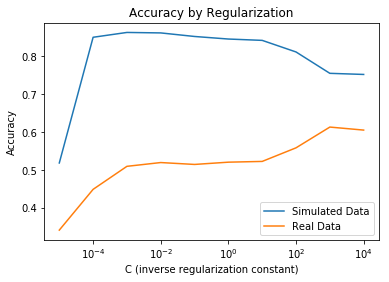

In [17]:
a = np.arange(len(C_vals))

plt.plot(C_vals, accuracies_sim)
plt.plot(C_vals, accuracies_real)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('Accuracy')
plt.title('Accuracy by Regularization')
plt.legend(['Simulated Data', 'Real Data'], loc='lower right')

#plt.savefig('../../plots/results/real/LR_pC_accuracyxC_50x50x50.pdf')

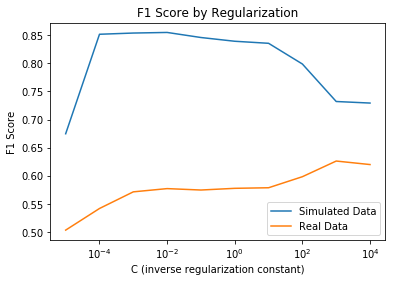

In [18]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_sim)
plt.plot(C_vals, f1s_real)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization')
plt.legend(['Simulated Data', 'Real Data'], loc='lower right')

#plt.savefig('')

# Predicting proton vs. Carbon + junk (w/ Simulated Noise)

In [19]:
# proton 0s
# Carbon+junk 1s
pCjunk_sim = sp.sparse.vstack([p_sim, C_sim, junk_sim], format='csr')
pCjunk_sim_labels = np.hstack((p_sim_labels, C_sim_labels, junk_sim_labels))

pCjunk_real = sp.sparse.vstack([p_real, C_real, junk_real], format='csr')
pCjunk_real_labels = np.hstack((p_real_labels, C_real_labels, junk_real_labels))

In [20]:
pCjunk_sim_train, pCjunk_sim_test, pCjunk_sim_labels_train, pCjunk_sim_labels_test = train_test_split(pCjunk_sim, pCjunk_sim_labels, test_size=0.25, random_state=42)

In [28]:
reg = 0.1
lr_pCjunk = LogisticRegression(C=reg)
lr_pCjunk.fit(pCjunk_sim_train, pCjunk_sim_labels_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
#train on simulated + test on simulated 
pCjunk_sim_pred = lr_pCjunk.predict(pCjunk_sim_test)

print("Accuracy: " + str(metrics.accuracy_score(pCjunk_sim_labels_test, pCjunk_sim_pred)))
print(metrics.classification_report(pCjunk_sim_labels_test, pCjunk_sim_pred))
print(metrics.confusion_matrix(pCjunk_sim_labels_test, pCjunk_sim_pred))

Accuracy: 0.5763474550848305
             precision    recall  f1-score   support

        0.0       0.37      0.38      0.38     10050
        1.0       0.68      0.67      0.68     19951

avg / total       0.58      0.58      0.58     30001

[[ 3863  6187]
 [ 6523 13428]]


In [30]:
#train on simulated + test on real 
pCjunk_real_pred = lr_pCjunk.predict(pCjunk_real)

print("Accuracy: " + str(metrics.accuracy_score(pCjunk_real_labels, pCjunk_real_pred)))
print(metrics.classification_report(pCjunk_real_labels, pCjunk_real_pred))
print(metrics.confusion_matrix(pCjunk_real_labels, pCjunk_real_pred))

print(pCjunk_real_pred.shape)
print(np.sum(pCjunk_real_pred))

Accuracy: 0.7791000371885459
             precision    recall  f1-score   support

        0.0       0.64      0.24      0.35       663
        1.0       0.79      0.96      0.87      2026

avg / total       0.76      0.78      0.74      2689

[[ 158  505]
 [  89 1937]]
(2689,)
2442.0


# Predicting proton vs. Carbon vs. junk (w/ Simulated Noise) - **multi-class**

In [24]:
#protons 0
#carbons 1
#junk 2

#create junk 2s labels
junkMC_sim_labels = np.full(junk_sim_labels.shape, 2)
junkMC_real_labels = np.full(junk_real_labels.shape, 2)

multi_sim = sp.sparse.vstack([p_sim, C_sim, junk_sim], format='csr')
multi_sim_labels = np.hstack((p_sim_labels, C_sim_labels, junkMC_sim_labels))

multi_real = sp.sparse.vstack([p_real, C_real, junk_real], format='csr')
multi_real_labels = np.hstack((p_real_labels, C_real_labels, junkMC_real_labels))

In [25]:
multi_sim_train, multi_sim_test, multi_sim_labels_train, multi_sim_labels_test = train_test_split(multi_sim, multi_sim_labels, test_size=0.25, random_state=42)

In [39]:
reg = 0.001
lr_multi = LogisticRegression(C=reg, multi_class='ovr')
lr_multi.fit(multi_sim_train, multi_sim_labels_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
#train on simulated + test on simulated 
multi_sim_pred = lr_multi.predict(multi_sim_test)

print("Accuracy: " + str(metrics.accuracy_score(multi_sim_labels_test, multi_sim_pred)))
print(metrics.classification_report(multi_sim_labels_test, multi_sim_pred))
print(metrics.confusion_matrix(multi_sim_labels_test, multi_sim_pred))

Accuracy: 0.6655778140728642
             precision    recall  f1-score   support

        0.0       0.54      0.39      0.45     10050
        1.0       0.85      0.85      0.85     10053
        2.0       0.59      0.75      0.66      9898

avg / total       0.66      0.67      0.66     30001

[[3916 1414 4720]
 [1071 8589  393]
 [2308  127 7463]]


In [41]:
#train on simulated + test on simulated 
multi_real_pred = lr_multi.predict(multi_real)

print("Accuracy: " + str(metrics.accuracy_score(multi_real_labels, multi_real_pred)))
print(metrics.classification_report(multi_real_labels, multi_real_pred))
print(metrics.confusion_matrix(multi_real_labels, multi_real_pred))

Accuracy: 0.330606173298624
             precision    recall  f1-score   support

        0.0       0.65      0.13      0.21       663
        1.0       0.16      0.96      0.28       340
        2.0       0.89      0.28      0.43      1686

avg / total       0.74      0.33      0.36      2689

[[  85  529   49]
 [   4  327    9]
 [  42 1167  477]]


# Predicting proton vs. junk (w/ Simulated Noise)

In [42]:
# proton 0s
# junk 1s
pjunk_sim = sp.sparse.vstack([p_sim, junk_sim], format='csr')
pjunk_sim_labels = np.hstack((p_sim_labels, junk_sim_labels))

pjunk_real = sp.sparse.vstack([p_real, junk_real], format='csr')
pjunk_real_labels = np.hstack((p_real_labels, junk_real_labels))

In [43]:
pjunk_sim_train, pjunk_sim_test, pjunk_sim_labels_train, pjunk_sim_labels_test = train_test_split(pjunk_sim, pjunk_sim_labels, test_size=0.25, random_state=42)

In [44]:
reg = 0.001
lr_pjunk = LogisticRegression(C=reg)
lr_pjunk.fit(pjunk_sim_train, pjunk_sim_labels_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#train on simulated + test on simulated 
pjunk_sim_pred = lr_pjunk.predict(pjunk_sim_test)

print("Accuracy: " + str(metrics.accuracy_score(pjunk_sim_labels_test, pjunk_sim_pred)))
print(metrics.classification_report(pjunk_sim_labels_test, pjunk_sim_pred))
print(metrics.confusion_matrix(pjunk_sim_labels_test, pjunk_sim_pred))

Accuracy: 0.6808159592020399
             precision    recall  f1-score   support

        0.0       0.70      0.64      0.67     10002
        1.0       0.67      0.72      0.69      9999

avg / total       0.68      0.68      0.68     20001

[[6435 3567]
 [2817 7182]]


In [46]:
#train on simulated + test on real 
pjunk_real_pred = lr_pjunk.predict(pjunk_real)

print("Accuracy: " + str(metrics.accuracy_score(pjunk_real_labels, pjunk_real_pred)))
print(metrics.classification_report(pjunk_real_labels, pjunk_real_pred))
print(metrics.confusion_matrix(pjunk_real_labels, pjunk_real_pred))

Accuracy: 0.4099616858237548
             precision    recall  f1-score   support

        0.0       0.32      0.94      0.47       663
        1.0       0.90      0.20      0.33      1686

avg / total       0.73      0.41      0.37      2349

[[ 625   38]
 [1348  338]]
